In [5]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')


In [36]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

# m50      =(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca50m/*.hkl'))
# m5       =(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca5m/*.hkl'))
# HC10_50_5=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC10_la50m_oc5m2/*.hkl'))
# HC20_50_5=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/*.hkl'))
# HC30_50_5=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC30_la50m_oc5m/*.hkl'))

# HC10_5_50=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC10_la5m_oc50m/*.hkl'))
# HC20_5_50=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la5m_oc50m/*.hkl'))
# HC30_5_50=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC30_la5m_oc50m/*.hkl'))


In [1]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

#### Invoke all the files
m1 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la1m_oc1m/*.hkl'))
m2=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la2m_oc2m/*.hkl'))
m3 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la3m_oc3m/*.hkl'))
m5 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la5m_oc5m/*.hkl'))
m8 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la8m_oc8m/*.hkl'))
m10 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la10m_oc10m/*.hkl'))
m12 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la12m_oc12m/*.hkl'))
m16 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la16m_oc16m/*.hkl'))
m20 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la20m_oc20m/*.hkl'))
m30 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la30m_oc30m/*.hkl'))
m50 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la50m_oc50m/*.hkl'))
m80 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la80m_oc80m/*.hkl'))
m100 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la100m_oc100m/*.hkl'))

In [40]:
# HC10_50_5=(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/precip/HC10_la5m_oc50m/*.hkl'))

In [28]:
# DEPTHS=[m5,HC10_50_5,HC20_50_5, HC30_50_5,m50,HC10_5_50, HC20_5_50,HC30_5_50]
DEPTHS=[m1, m2, m3, m5, m8, m10, m12, m16, m20, m30, m50, m80, m100]
depths=[1, 2, 3, 5,8,10, 12,16,20,30,50,80, 100]
flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
raw=[]
tsurf=[]
mmc_decomp=[]
mmc_decomp_vert=[]
c=5
coord=load(m5[c])
for depth in DEPTHS:
    f=0; e=1; mmcv=2; r=3; fv=4; c=5; d=6; dv=7; mmc=8;
    mmc_decomp.append(load(depth[mmc]))
    eke.append(load(depth[e]))
    mmc_decomp.append(load(depth[mmc]))
    mmc_decomp_vert.append(load(depth[mmcv]))
    raw.append(load(depth[r]))
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))

In [7]:
# def save(X,name): 
#     Y={'d5':X[d5], 'd10':X[d10],'d50':X[d50], 'd100':X[d100]}
#     sio.savemat(name, Y)
# dest= '/project2/tas1/pragallva/Summer_quarter_2018/MAT_files/'  
# make_sure_path_exists(dest)
# save(flux,dest+"Isca_depths_FLUX_in_PW.mat")
# save(div, dest+"Isca_depths_DIV_in_W_m2.mat")
# save(raw, dest+"Isca_depths_RAW_data_all_levels.mat")
# sio.savemat(dest+"coordinates.mat", coord)

In [8]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X


In [9]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [10]:
# num=str(0);edge=str(10);land=str(5);ocean=str(50)
# source='/project2/tas1/pragallva/Summer_quarter_2018/exp_data/HC'+edge+'_la'+land+'m_oc'+ocean+'m/'
# one_year=source+'HC'+edge+'_la'+land+'m_oc'+ocean+'m'+num+'.nc'
# v_variables = nc.Dataset(one_year,'r')
# v_var=v_variables.variables
# sigma_half=v_var['phalf'][::-1]
# pres_half=v_var['pres_half'][:,::-1,:,:]

# Save temperature and other vertical fields

In [11]:
T=[]; Q=[]; U=[]; V=[]; Z=[]; EKE=[]; EMF=[];
MMv=[]; SEv=[]; NEv=[]; TEv=[];
divMMv=[]; divSEv=[]; divNEv=[]; divTEv=[];

del_m_mmc=[]; del_v_mmc=[];
del_m_mmc_vert=[]; del_v_mmc_vert=[];
 

for depth in range(len(DEPTHS)):
    T.append(M(raw[depth]['T']))
    Q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    V.append(M(raw[depth]['V']))
    Z.append(M(raw[depth]['Z']))
    EKE.append(M(eke[depth]['EKE']))
    EMF.append(M(eke[depth]['EMF']))
    
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))
        
    divMMv.append(M(div_vert[depth]['MM']))
    divSEv.append(M(div_vert[depth]['SE']))
    divTEv.append(M(div_vert[depth]['TE']))
    divNEv.append(M(div_vert[depth]['NE']))
    
    del_m_mmc.append(M(mmc_decomp[depth]['del_m_mmc']))
    del_v_mmc.append(M(mmc_decomp[depth]['del_v_mmc']))
    
    del_m_mmc_vert.append(M(mmc_decomp_vert[depth]['del_m_mmc']))
    del_v_mmc_vert.append(M(mmc_decomp_vert[depth]['del_v_mmc']))
    
T=np.array(T); U=np.array(U); V=np.array(V); Z=np.array(Z); Q=np.array(Q); EKE=np.array(EKE); EMF= np.array(EMF)
MMv=np.array(MMv); SEv=np.array(SEv); TEv=np.array(TEv); NEv=np.array(NEv);
divMMv=np.array(divMMv); divSEv=np.array(divSEv); divTEv=np.array(divTEv); divNEv=np.array(divNEv);

In [12]:
TE=[]; MM=[]; SE=[]; INE=[]; EKE_vert=[]; EMF_vert=[]; 
for depth in range(len(DEPTHS)):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [13]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(len(DEPTHS)):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

In [14]:
def M(x):
    return np.array(x)
lat=div[0]['latn']
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]; TS=[]; precip=[]
for depth in range(len(DEPTHS)):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

In [15]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE); EKE_vert=np.array(EKE_vert); EMF_vert=np.array(EMF_vert)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);
ISFC=np.array(ISFC); ITOA=np.array(ITOA); 
del_m_mmc=np.array(del_m_mmc); del_v_mmc=np.array(del_v_mmc)


In [16]:
del_v_mmc.shape

(13, 1741, 12)

# Average Northern and Southern Hemispheres

In [17]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [18]:
del_m_mmc.shape

(13, 1741, 12)

In [19]:
TE_a   ,SE_a     , MM_a  , NE_a  , NE_a,   lat_a  = N_S_avg(TE, SE, MM, NE, NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

del_v_mmc_a, del_m_mmc_a= N_S_avg( del_v_mmc, del_m_mmc,del_v_mmc, del_m_mmc,del_v_mmc, lat )[0:2]




In [20]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div

div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [21]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [22]:
sigma= 5.670367e-8 ## Stefan's constant
Rd=286.9 # J/Kg
Rv=461.5 # J/kg
Cp= 1004.64 # J/kg/deg
g= 9.8
L=2.500e6 # J/kg
a=6371.0e3  ## m
CpT=Cp*T
Lq =L*Q
gZ =g*Z

In [23]:
from scipy.interpolate import interp1d

def interpolate_pressure(div):
  interp_pres = np.zeros((1741,41,12))
  for p in range(0,41):
      for m in range(0,12):
            interpolation_function = interp1d(coord['lat'],div[m,p,:],kind='cubic')
            interp_pres[:,p,m]     =interpolation_function(lat)      
  return interp_pres

# pressure=interpolate_pressure(ps)

In [24]:
def plot_flux(d,field) :
    
    n=d+1
    

    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,0,axis=-1)  
       return y
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-20.0, 21.0, 1)
    lat=lat_a

    b = py.contourf(range(13),lat,add(field[d,...]), v,cmap=BuRd); py.colorbar()
    c=py.contour(range(13),lat, add(field[d,...]), v,colors='k',linewidths=1.0);
    
#     py.plot(range(12), np.roll((pos[d,:]),0), 'ro-')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depths[d])+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
#     py.ylim(0,80)

In [25]:
del_m_mmc_a.shape

(13, 871, 13)

In [29]:
fig=py.figure(figsize=(40, 20))
field=del_m_mmc_a
for d in range(12):
    py.subplot(3,4,d+1)
    plot_flux(d,field)
#     py.ylim(0,80)

In [31]:
fig=py.figure(figsize=(40, 20))
field=del_v_mmc_a
for d in range(12):
    py.subplot(3,4,d+1)
    plot_flux(d,field)
#     py.ylim(0,80)

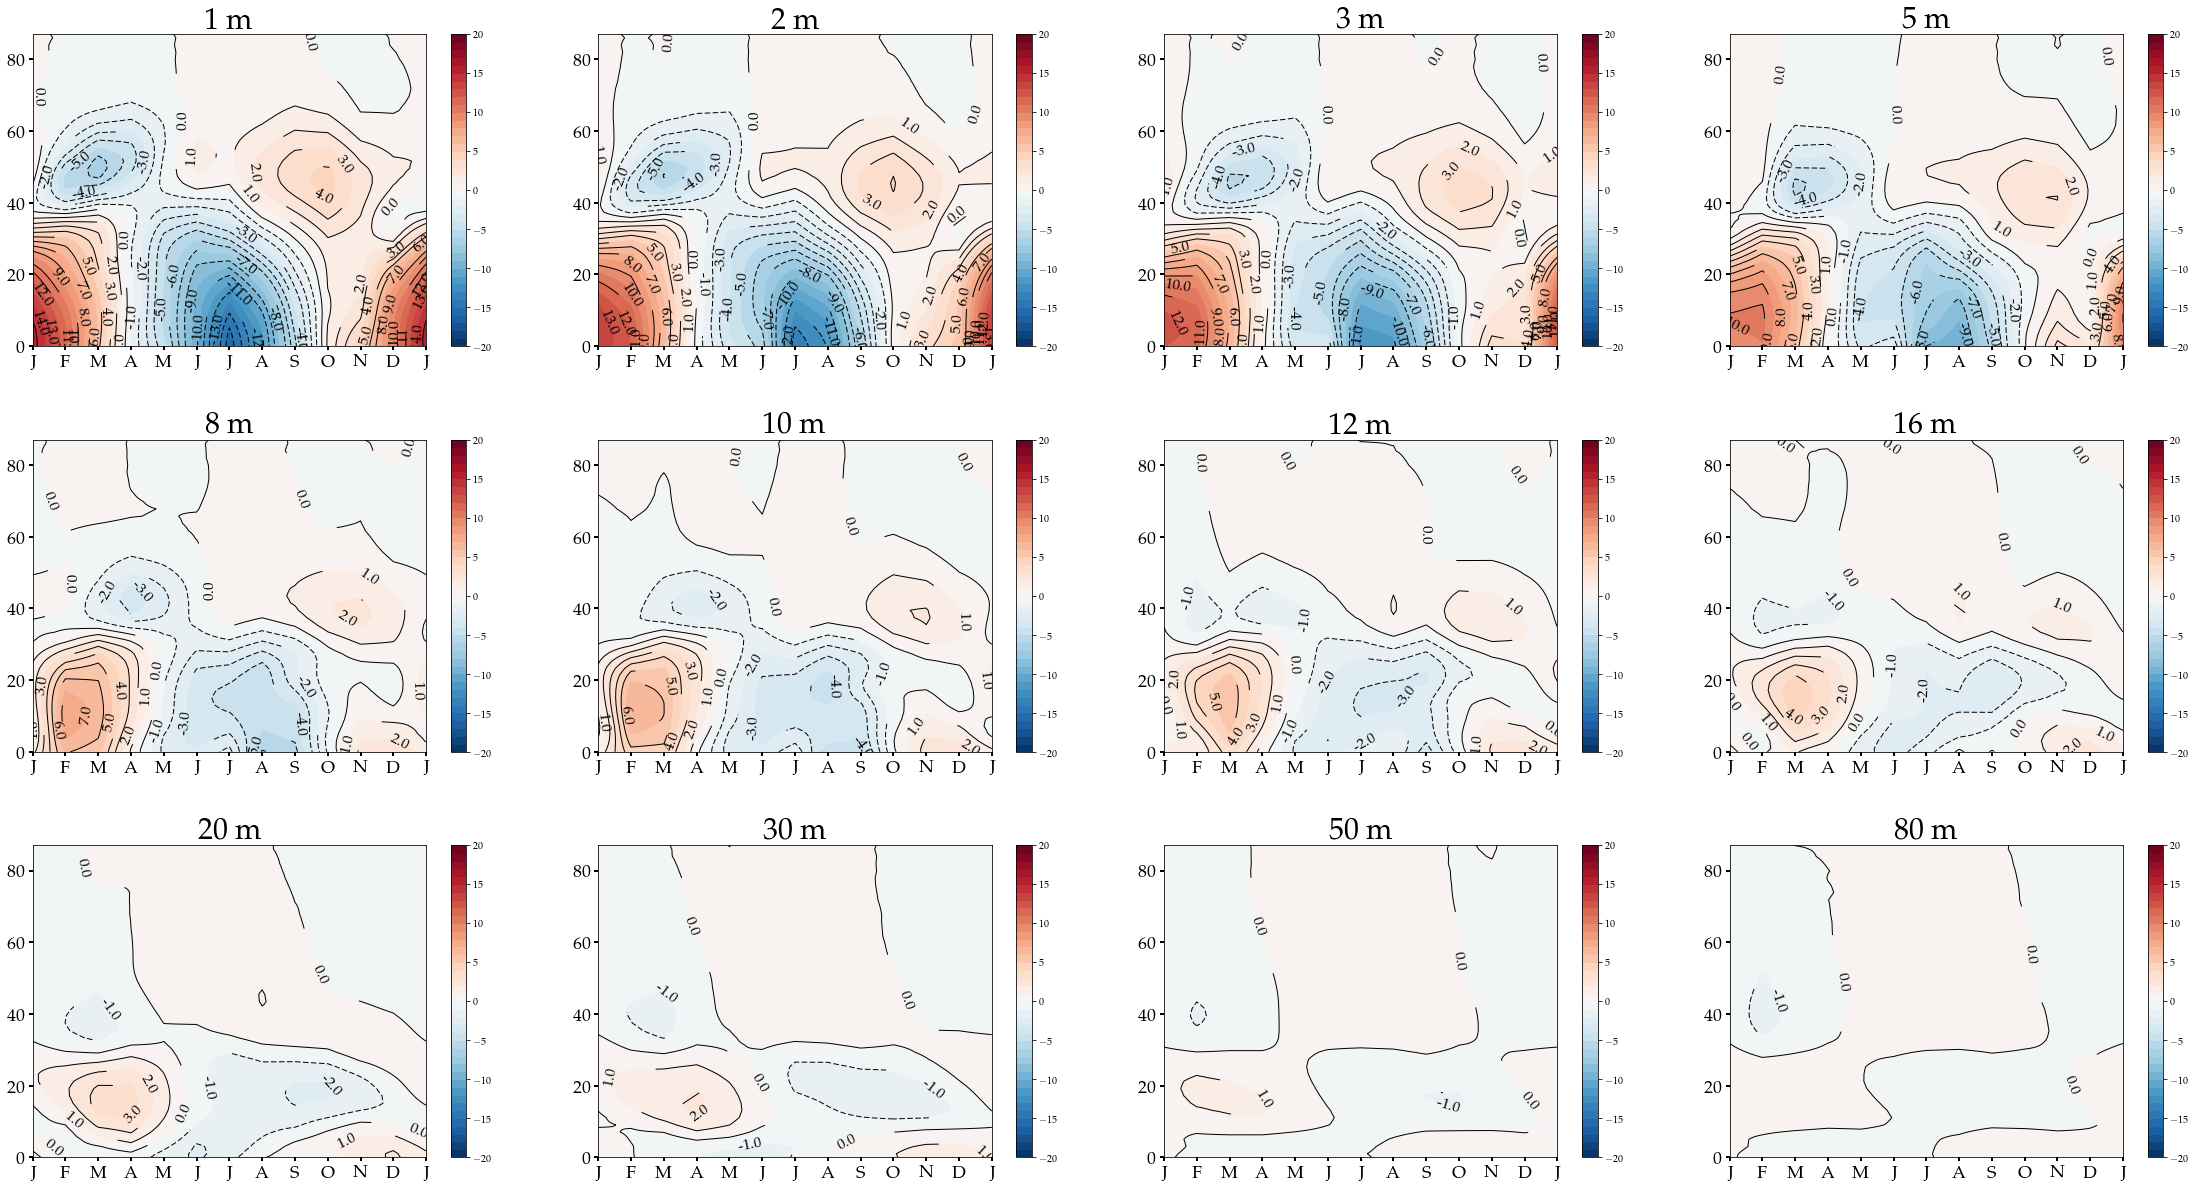

In [32]:
fig=py.figure(figsize=(40, 20))
field=MM_a-MM_a[...,:-1].mean(axis=-1)[...,None]
for d in range(12):
    py.subplot(3,4,d+1)
    plot_flux(d,field)
#     py.ylim(0,80)

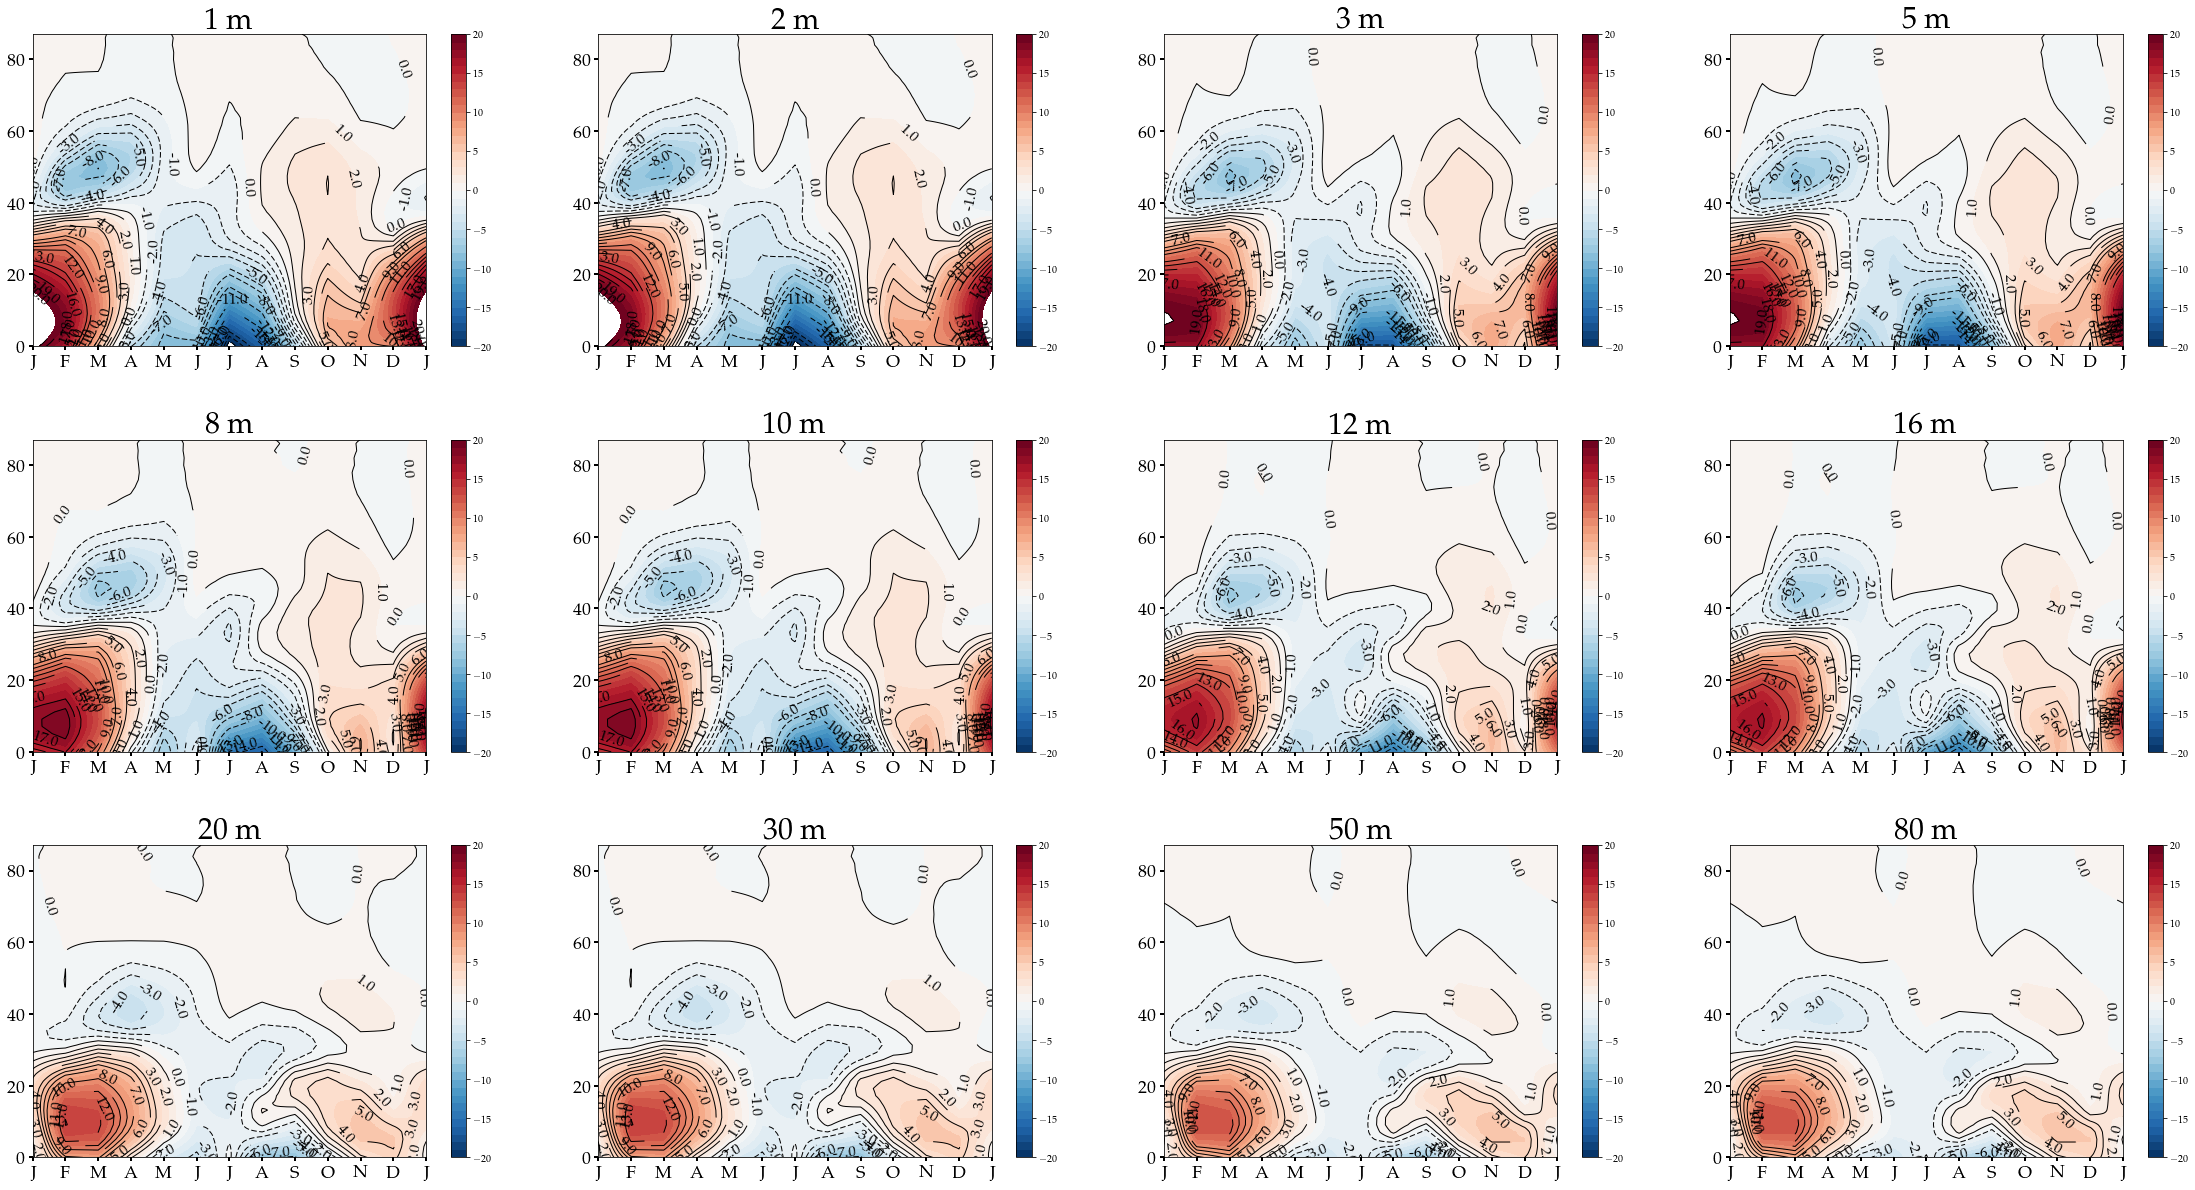

In [33]:
fig=py.figure(figsize=(40, 20))
field=del_v_mmc_a+del_m_mmc_a
for d in range(12):
    py.subplot(3,4,d+1)
    plot_flux(d,field)
#     py.ylim(0,80)

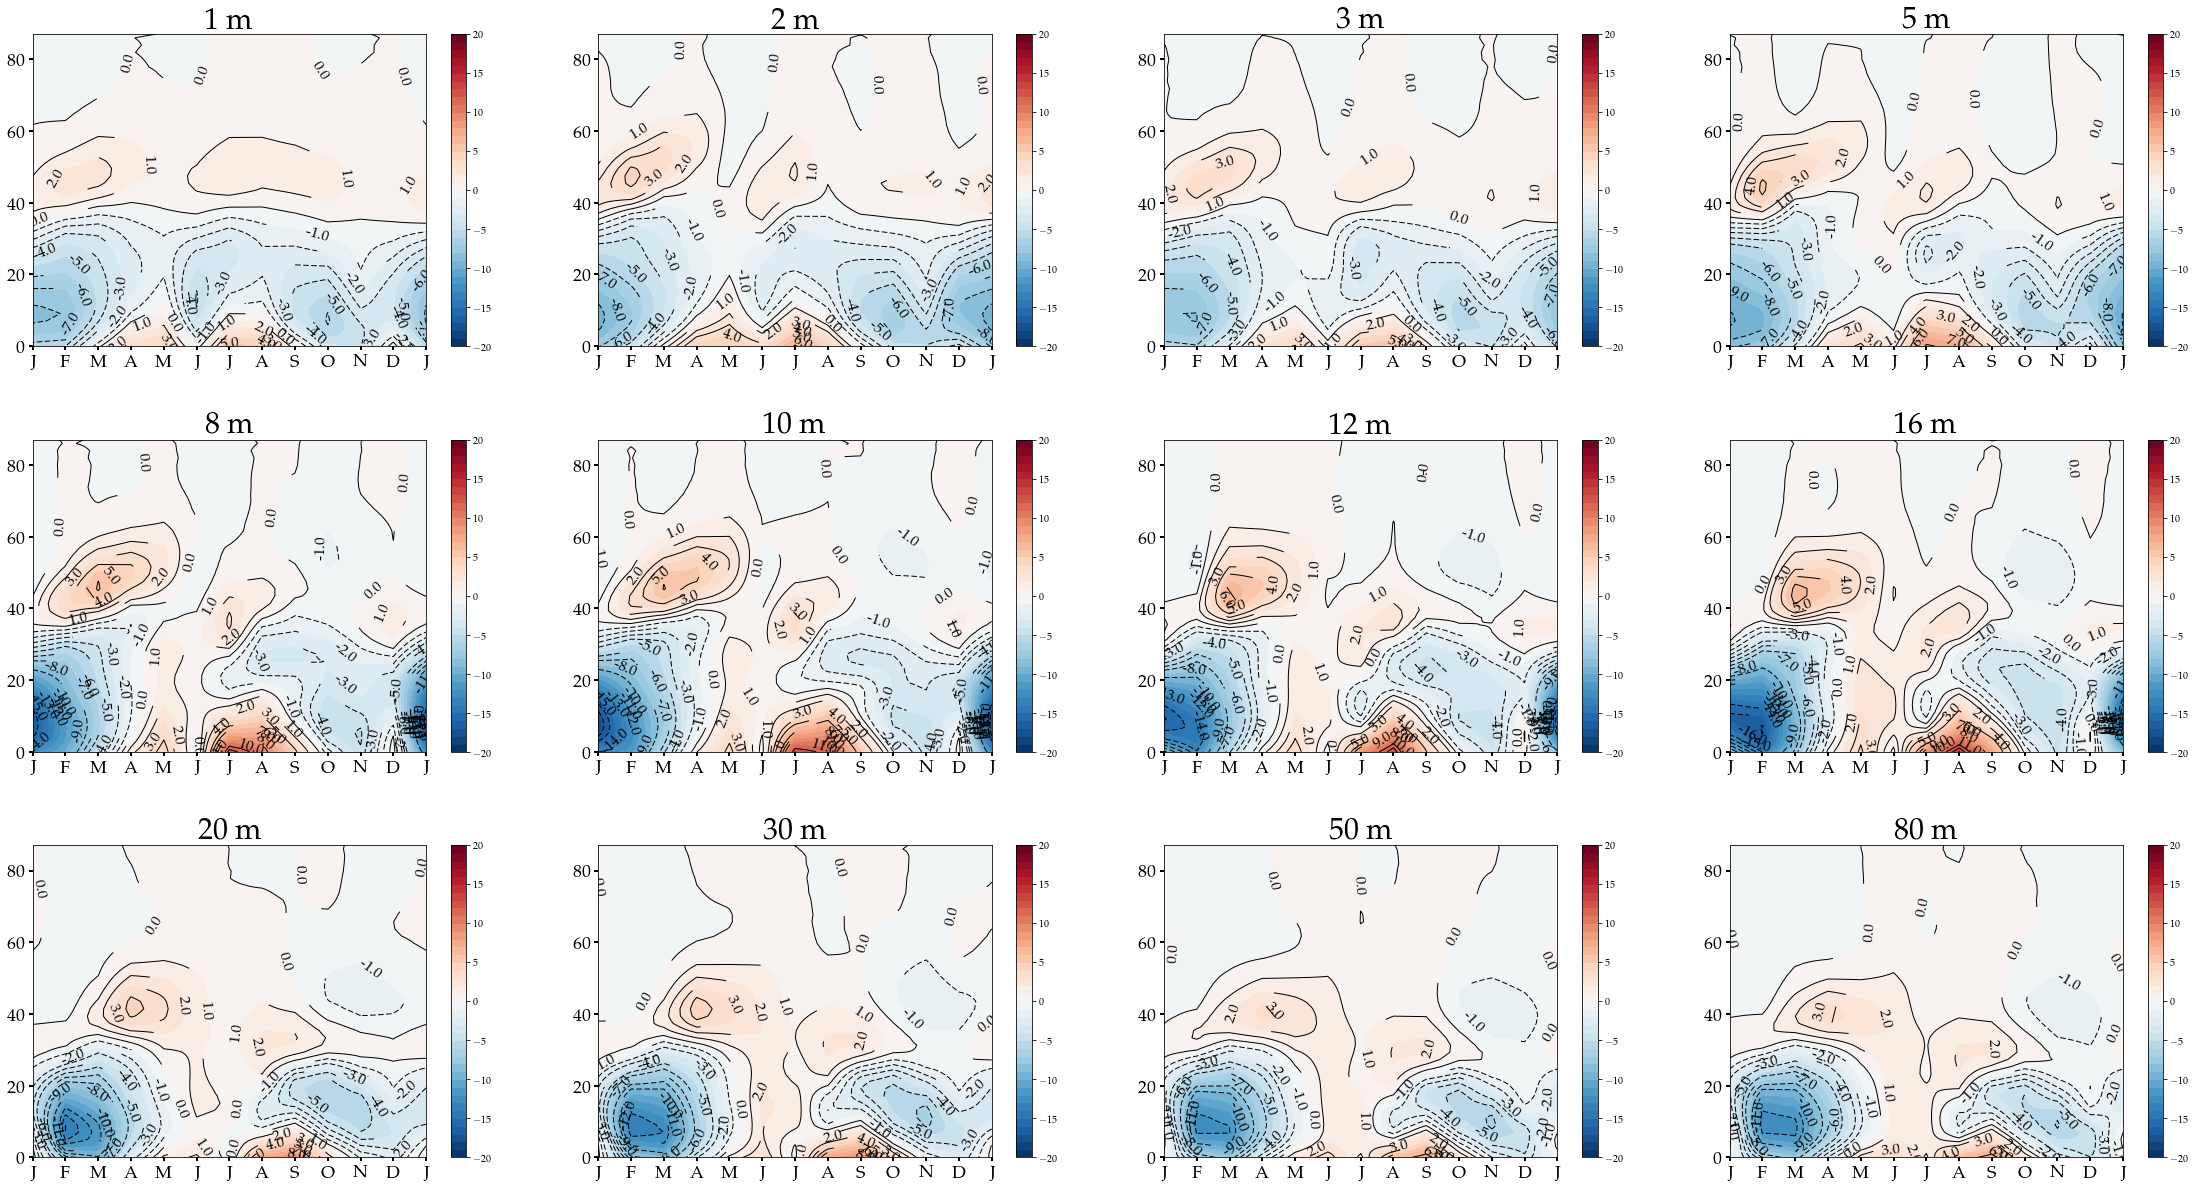

In [37]:
fig=py.figure(figsize=(40, 20))
field=(MM_a-MM_a[...,:-1].mean(axis=-1)[...,None])- (del_v_mmc_a+del_m_mmc_a)
for d in range(12):
    py.subplot(3,4,d+1)
    plot_flux(d,field)
#     py.ylim(0,80)

In [34]:
MM_a[d,:,:-1].mean(axis=-1)[...,None].shape

(871, 1)

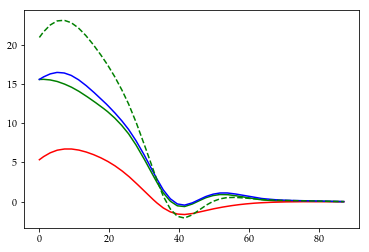

In [36]:
d=0; m=0
py.plot(lat_a,MM_a[d,:,m]-MM_a[d,:,:-1].mean(axis=-1),'g-')
py.plot(lat_a,del_m_mmc_a[d,:,m],'r-')
py.plot(lat_a,del_v_mmc_a[d,:,m],'b-')
py.plot(lat_a,del_v_mmc_a[d,:,m]+del_m_mmc_a[d,:,m],'g--')

### $\langle\left(\Delta\left[\bar{v}\right]\right)\left[\bar{m}\right]_{o}\rangle$,  $\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$,  $\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$


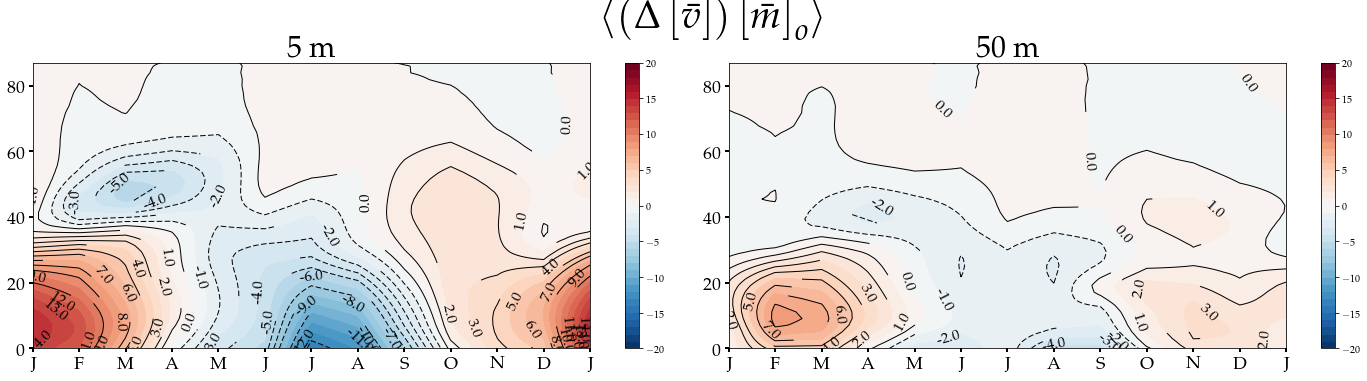

In [39]:
fig=py.figure(figsize=(20, 5))
field=del_v_mmc_a

ds=[3,-3]; i=0;
for d in ds:
    i=i+1
    py.subplot(1,2,i)
    plot_flux(d,field)
py.suptitle(r"$\langle\left(\Delta\left[\bar{v}\right]\right)\left[\bar{m}\right]_{o}\rangle$",fontsize=40, y=1.05)
py.tight_layout()
#     py.ylim(0,80)

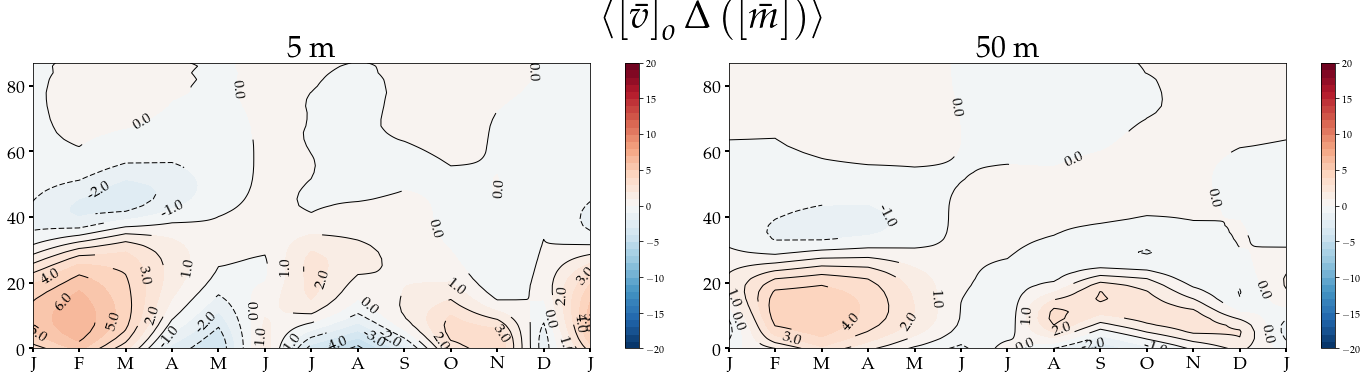

In [40]:
fig=py.figure(figsize=(20, 5))
field=del_m_mmc_a

ds=[3,-3]; i=0;
for d in ds:
    i=i+1
    py.subplot(1,2,i)
    plot_flux(d,field)
py.suptitle(r"$\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$",fontsize=40, y=1.05)
py.tight_layout()
#     py.ylim(0,80)

In [41]:
fig=py.figure(figsize=(20, 5))
field=MM_a-MM_a[...,:-1].mean(axis=-1)[...,None]

ds=[3,-3]; i=0;
for d in ds:
    i=i+1
    py.subplot(1,2,i)
    plot_flux(d,field)
py.suptitle(r"$\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$",fontsize=40, y=1.05)
py.tight_layout()
#     py.ylim(0,80)

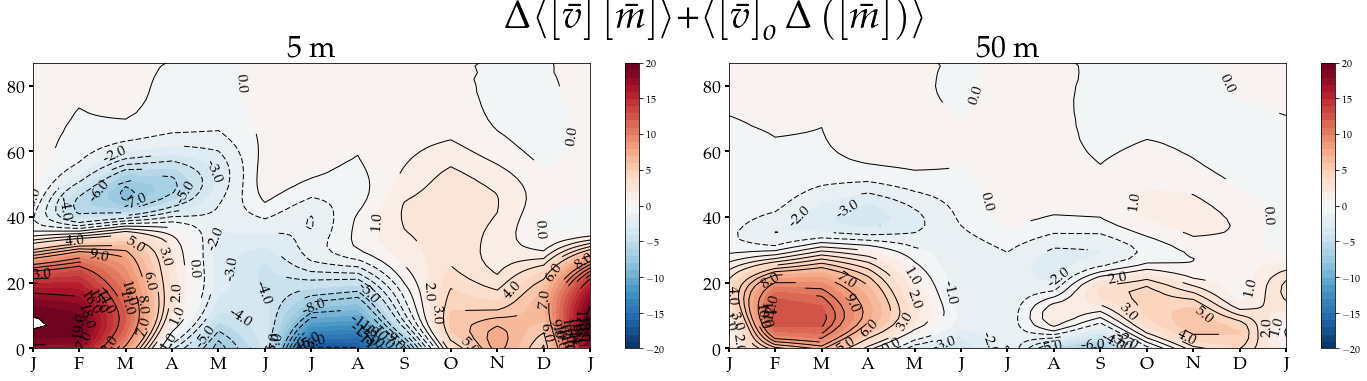

In [42]:
fig=py.figure(figsize=(20, 5))
field=del_v_mmc_a+del_m_mmc_a

ds=[3,-3]; i=0;
for d in ds:
    i=i+1
    py.subplot(1,2,i)
    plot_flux(d,field)
py.suptitle(r"$\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$" + "+" + r"$\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$",fontsize=40, y=1.05)
py.tight_layout()
#     py.ylim(0,80)